In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
df1=pd.read_csv("/content/AgSentAnaly.csv")
df1['label']=0
df1.head(10)

,No.,pos,neg,neu,compound,Selected,Message,label
0,1,0.035,0.104,0.861,-0.6187,No,Libya casualty report French operations You ...,0
1,2,0.000,0.160,0.840,-0.2732,No,Just for the record that IP is blocked for ho...,0
2,3,0.000,0.000,1.000,0.0000,No,Big Brother Australia I see you have partial...,0
3,4,0.091,0.079,0.830,0.1814,No,WikipediaFeatured portal candidatesPortalOrgan...,0
4,5,0.112,0.000,0.888,0.4404,No,wiki cant edit could you make Thai airways s...,0
5,6,0.000,0.240,0.760,-0.6249,No,IMrTrippy That you havent grasped that Humanit...,0
6,7,0.151,0.131,0.718,0.0225,No,Yes theres no problem with leaving it in a par...,0
7,8,0.019,0.075,0.906,-0.6808,No,It seems to be your hobby to look around if so...,0
8,9,0.054,0.106,0.840,-0.2023,No,Orange and Pomegranate limited edition The ar...,0
9,10,0.134,0.060,0.806,0.6771,No,The fact that you cant at present get your own...,0


In [ ]:
df2=pd.read_csv("/content/NonAgSentAnaly.csv")
df2['label']=1
df2.head(10)

,No.,pos,neg,neu,compound,Selected,Message,label
0,1,0.000,0.086,0.914,-0.0572,No,zhha Islam does nothing but freeze the status ...,1
1,2,0.000,0.000,1.000,0.0000,No,You dont get out much do you,1
2,3,0.101,0.408,0.490,-0.8860,No,MaxBlumenthal Campagnebds Blumenthal self prom...,1
3,4,0.093,0.160,0.748,-0.3836,No,No silly it isnt ITS UR MOMS and might I say q...,1
4,5,0.110,0.178,0.712,-0.2838,No,Yes there is even more rape in Muslim countrie...,1
5,6,0.284,0.000,0.716,0.9337,No,I think that you are so sexy and hot and sexy ...,1
6,7,0.082,0.364,0.554,-0.8454,No,hey shithead quit fucking with all the ufc p...,1
7,8,0.143,0.319,0.538,-0.8002,No,WOW you suck cock You upset me so much with yo...,1
8,9,0.051,0.106,0.843,-0.5859,No,Hahaha you dont actually believe this bullshit...,1
9,10,0.000,0.437,0.563,-0.7351,No,czechofile is worse than a pedophile czechof...,1


In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df

,No.,pos,neg,neu,compound,Selected,Message,label
0,1,0.035,0.104,0.861,-0.6187,No,Libya casualty report French operations You ...,0
1,2,0.000,0.160,0.840,-0.2732,No,Just for the record that IP is blocked for ho...,0
2,3,0.000,0.000,1.000,0.0000,No,Big Brother Australia I see you have partial...,0
3,4,0.091,0.079,0.830,0.1814,No,WikipediaFeatured portal candidatesPortalOrgan...,0
4,5,0.112,0.000,0.888,0.4404,No,wiki cant edit could you make Thai airways s...,0
...,...,...,...,...,...,...,...,...
118823,118824,0.158,0.000,0.842,0.4927,No,I really hope Kat gets hit by a bus than rever...,1
118824,118825,0.065,0.045,0.891,0.1531,No,Smarojit Chakravarty I know your Facebook prof...,1
118825,118826,0.235,0.000,0.765,0.4703,No,Is it me or are you a fucking nb Have a nic...,1
118826,118827,0.000,0.438,0.562,-0.7783,No,This ARTICLE sucks major cock you people are p...,1


In [ ]:
df.drop(columns=['No.','Selected'], axis=1, inplace=True)

In [ ]:
df

,pos,neg,neu,compound,Message,label
0,0.035,0.104,0.861,-0.6187,Libya casualty report French operations You ...,0
1,0.000,0.160,0.840,-0.2732,Just for the record that IP is blocked for ho...,0
2,0.000,0.000,1.000,0.0000,Big Brother Australia I see you have partial...,0
3,0.091,0.079,0.830,0.1814,WikipediaFeatured portal candidatesPortalOrgan...,0
4,0.112,0.000,0.888,0.4404,wiki cant edit could you make Thai airways s...,0
...,...,...,...,...,...,...
118823,0.158,0.000,0.842,0.4927,I really hope Kat gets hit by a bus than rever...,1
118824,0.065,0.045,0.891,0.1531,Smarojit Chakravarty I know your Facebook prof...,1
118825,0.235,0.000,0.765,0.4703,Is it me or are you a fucking nb Have a nic...,1
118826,0.000,0.438,0.562,-0.7783,This ARTICLE sucks major cock you people are p...,1


In [ ]:
df.shape

(237656, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237656 entries, 0 to 118827
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   pos       237656 non-null  float64
 1   neg       237656 non-null  float64
 2   neu       237656 non-null  float64
 3   compound  237656 non-null  float64
 4   Message   237585 non-null  object 
 5   label     237656 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.7+ MB


In [ ]:
df["Message"].fillna("", inplace=True)

In [ ]:
X_text = df["Message"]
X_sentiment = df[["pos", "neg", "neu", "compound"]]
X = pd.concat([X_text, X_sentiment], axis=1)

In [ ]:
X

,Message,pos,neg,neu,compound
0,Libya casualty report French operations You ...,0.035,0.104,0.861,-0.6187
1,Just for the record that IP is blocked for ho...,0.000,0.160,0.840,-0.2732
2,Big Brother Australia I see you have partial...,0.000,0.000,1.000,0.0000
3,WikipediaFeatured portal candidatesPortalOrgan...,0.091,0.079,0.830,0.1814
4,wiki cant edit could you make Thai airways s...,0.112,0.000,0.888,0.4404
...,...,...,...,...,...
118823,I really hope Kat gets hit by a bus than rever...,0.158,0.000,0.842,0.4927
118824,Smarojit Chakravarty I know your Facebook prof...,0.065,0.045,0.891,0.1531
118825,Is it me or are you a fucking nb Have a nic...,0.235,0.000,0.765,0.4703
118826,This ARTICLE sucks major cock you people are p...,0.000,0.438,0.562,-0.7783


In [ ]:
y = df["label"]

In [ ]:
X_train_text, X_test_text, X_train_sentiment, X_test_sentiment, y_train, y_test = train_test_split(X_text, X_sentiment, y, test_size=0.2, random_state=42)

In [ ]:
from scipy import sparse

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Combine TF-IDF features with sentiment scores
X_train_features = sparse.hstack([X_train_tfidf, sparse.csr_matrix(X_train_sentiment.values)])
X_test_features = sparse.hstack([X_test_tfidf, sparse.csr_matrix(X_test_sentiment.values)])

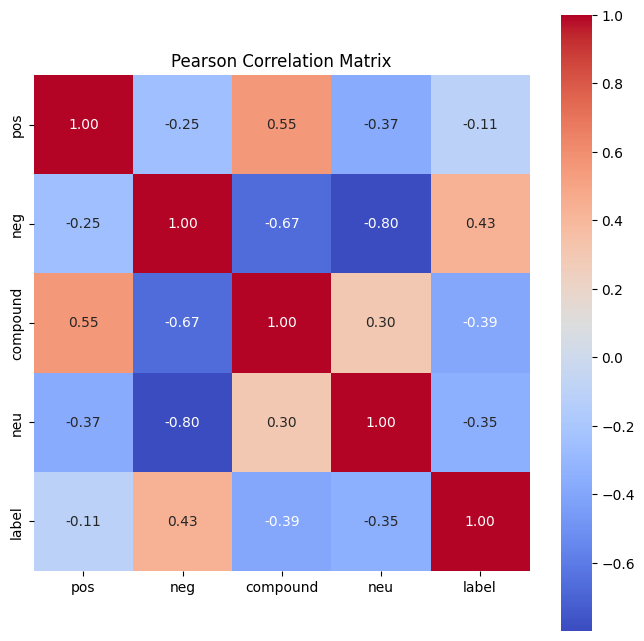

In [ ]:
import seaborn as sns
import numpy as np
columns=['pos','neg','compound','neu','label']
# Calculate Pearson correlation matrix
correlation_matrix = df[columns].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=columns, yticklabels=columns)
plt.title('Pearson Correlation Matrix')
plt.show()


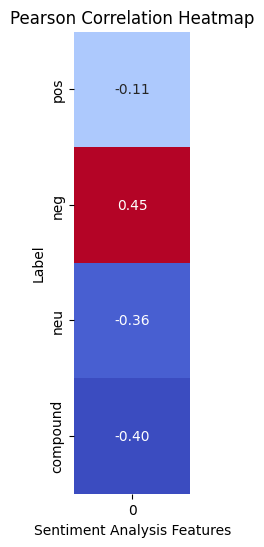

In [ ]:
sentiment_features = df[['pos', 'neg', 'neu', 'compound']]
label = df['label']

correlation_matrix = sentiment_features.corrwith(label)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=False)
plt.title('Pearson Correlation Heatmap')
plt.xlabel('Sentiment Analysis Features')
plt.ylabel('Label')
plt.show()


Training and evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6911
           1       0.89      0.89      0.89      9145

    accuracy                           0.87     16056
   macro avg       0.87      0.87      0.87     16056
weighted avg       0.87      0.87      0.87     16056



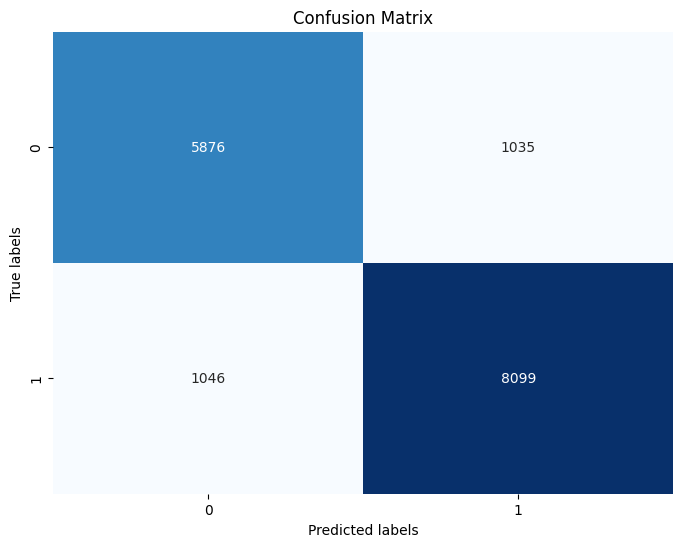

Accuracy: 0.8703911310413552
Precision: 0.8866871031311583
Recall: 0.8856205576817934
F1 Score: 0.8861535094917666

Training and evaluating Stochastic Gradient Descent...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6911
           1       0.85      0.86      0.86      9145

    accuracy                           0.84     16056
   macro avg       0.83      0.83      0.83     16056
weighted avg       0.84      0.84      0.84     16056



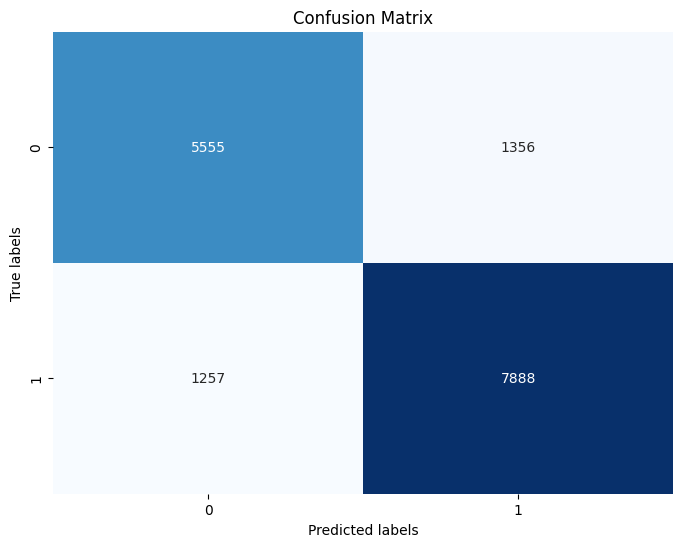

Accuracy: 0.8372571001494769
Precision: 0.8533102553007356
Recall: 0.8625478403499179
F1 Score: 0.8579041818478438

Training and evaluating AdaBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      6911
           1       0.84      0.79      0.81      9145

    accuracy                           0.79     16056
   macro avg       0.79      0.79      0.79     16056
weighted avg       0.80      0.79      0.79     16056



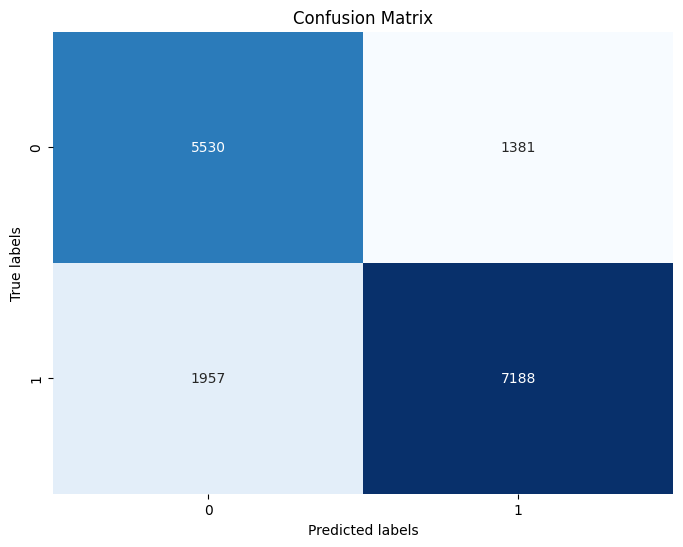

Accuracy: 0.7921026407573493
Precision: 0.8388376706733575
Recall: 0.7860032804811372
F1 Score: 0.8115614767980129

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 36498, number of negative: 27722
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 7.400585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322720
[LightGBM] [Info] Number of data points in the train set: 64220, number of used features: 7228
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568328 -> initscore=0.275031
[LightGBM] [Info] Start training from score 0.275031
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6911
           1       0.87      0.86      0.87      9145

    accuracy                           0.85     16056
   macro avg       0.85      0.85      0.85    

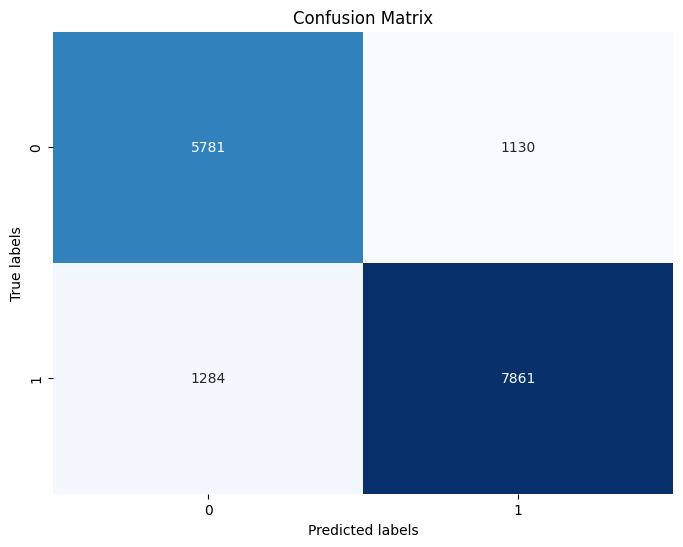

Accuracy: 0.8496512207274539
Precision: 0.8743187632076521
Recall: 0.8595954073264078
F1 Score: 0.8668945743273048



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Stochastic Gradient Descent": SGDClassifier(loss='log'),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for name, model in models.items():
    print(f"Training and evaluating {name}...")

    model.fit(X_train_features, y_train)

    predictions = model.predict(X_test_features)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # Calculate and display accuracy, precision, recall, and F1-score
    accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()
    precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print()

    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)


In [ ]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
df = pd.DataFrame(results_df)

df_sorted = df.sort_values(by='F1 Score', ascending=False)
print(df_sorted)

                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.870391   0.886687  0.885621  0.886154
3                     LightGBM  0.849651   0.874319  0.859595  0.866895
1  Stochastic Gradient Descent  0.837257   0.853310  0.862548  0.857904
2                     AdaBoost  0.792103   0.838838  0.786003  0.811561


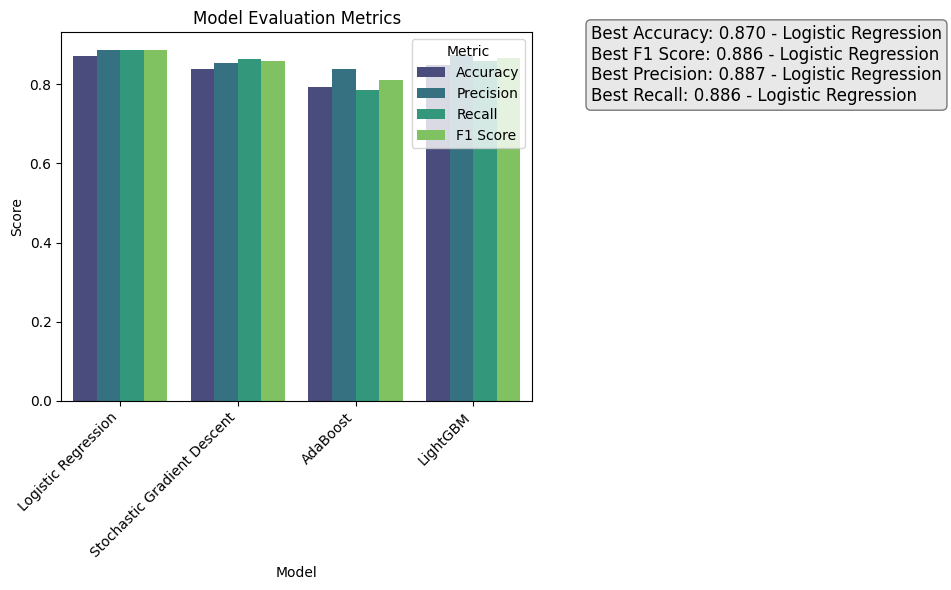

In [ ]:
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.legend(title='Metric')

best_accuracy_model = model_names[accuracies.index(max(accuracies))]
best_recall_model = model_names[recalls.index(max(recalls))]
best_precision_model = model_names[precisions.index(max(precisions))]
best_f1_model = model_names[f1_scores.index(max(f1_scores))]

textstr = '\n'.join([
    'Best Accuracy: {:.3f} - {}'.format(max(accuracies), best_accuracy_model),
    'Best F1 Score: {:.3f} - {}'.format(max(f1_scores), best_f1_model),
    'Best Precision: {:.3f} - {}'.format(max(precisions), best_precision_model),
    'Best Recall: {:.3f} - {}'.format(max(recalls), best_recall_model)
])

# Define properties for the text box
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

# Place a text box
plt.text(4.0, 0.95, textstr, fontsize=12, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()